# Netflix Titles — Exploratory Data Analysis (EDA)

**Goal:** Understand Netflix’s catalog by type, time trends, countries, genres, ratings, and durations.  
**Tools:** pandas, numpy, matplotlib, seaborn.

## Table of Contents

1) **Import Libraries**  
2) **Configure Plot Style**  
3) **Load Dataset**  
4) **High-Level Overview**  
5) **Data Cleaning**  
6) **Exploratory Data Analysis (EDA)**  
   - Distribution of Movie Durations  
   - Distribution of TV Show Seasons  
   - Number of Movies vs TV Shows  
   - Number of Titles Added per Year  
   - Movies vs TV Shows Added to Netflix by Year  
   - Content by Country  
     - Top 10 Countries Producing Netflix Content  
     - Top 5 Countries Producing Movies vs TV Shows  
   - Top Genres  
   - Ratings Analysis  
     - Overall Distribution  
     - Ratings by Content Type (Movies vs TV Shows)  
   - Trend Insights  
     - Pre vs Post-2018 Comparison  
     - Movies vs TV Shows Growth Over Time
7) **Conclusions & Limitations**


## 1) Import Libraries
Import the Python libraries used for data analysis and visualization.


In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2) Configure Plot Style
Set global visualization parameters for consistent chart appearance throughout the analysis.


In [55]:
plt.rcParams.update({
    "figure.figsize": (8, 4.5),
    "axes.grid": True,
    "grid.alpha": 0.25,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "axes.titlepad": 10,
    "axes.labelpad": 8,
    "figure.autolayout": True,
})

## 3) Data Loading
Load the Netflix dataset from the CSV file into a pandas DataFrame.


In [56]:
df = pd.read_csv('netflix_titles.csv')

## 4) High-Level Overview
Examine the dataset’s size, structure, data types, and basic statistics to get an initial understanding.


In [57]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [59]:
df.shape

(8807, 12)

In [60]:
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [61]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## 5) Data Cleaning
In this section, we handle missing values, standardize formats, and prepare the data for analysis.

In [62]:
df['director_clean'] = df['director'].fillna('Unknown')

In [63]:
df['cast_clean'] = df['cast'].fillna('Unknown')

In [64]:
df['country_clean'] = df['country'].fillna('Unknown')

In [65]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df_time = df.dropna(subset=['date_added'])


In [79]:
df['rating_clean'] = (
    df['rating']
    .fillna('Unknown')     
    .astype(str) 
    .str.strip()
    .str.upper()
)

print(df['rating_clean'].unique())


['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 MIN' '84 MIN' '66 MIN' 'NR' 'UNKNOWN' 'TV-Y7-FV' 'UR']


In [67]:
def parse_duration(row):
    if pd.isna(row['duration']):
        return np.nan
    val = str(row['duration']).lower()
    if row['type'] == 'Movie':
        return pd.to_numeric(val.split()[0], errors='coerce')
    else:
        return pd.to_numeric(val.split()[0], errors='coerce')

df['duration_num'] = df.apply(parse_duration, axis=1)

for content_type in df['type'].unique():
    median_val = df[df['type'] == content_type]['duration_num'].median()
    df.loc[(df['type'] == content_type) & (df['duration_num'].isna()), 'duration_num'] = median_val


## 6) Exploratory Data Analysis (EDA)
Visualize and analyze different aspects of the Netflix catalog, including durations, content types, countries, genres, ratings, and trends.


### Distribution of Movie Durations

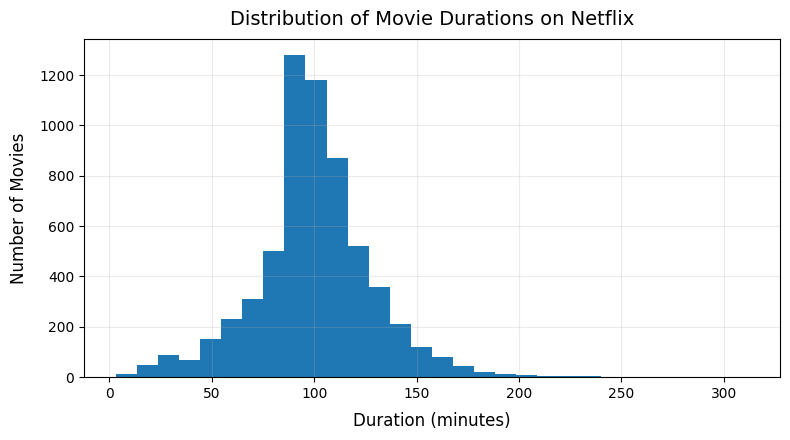

In [68]:
movies = df[df['type'] == 'Movie']
movies['duration_num'].plot(kind='hist', bins=30)

plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()


#### From the above chart, most Netflix movies have durations between 80 and 120 minutes, with the peak around 90–100 minutes, which is typical for feature-length films.


### Distribution of TV Show Seasons

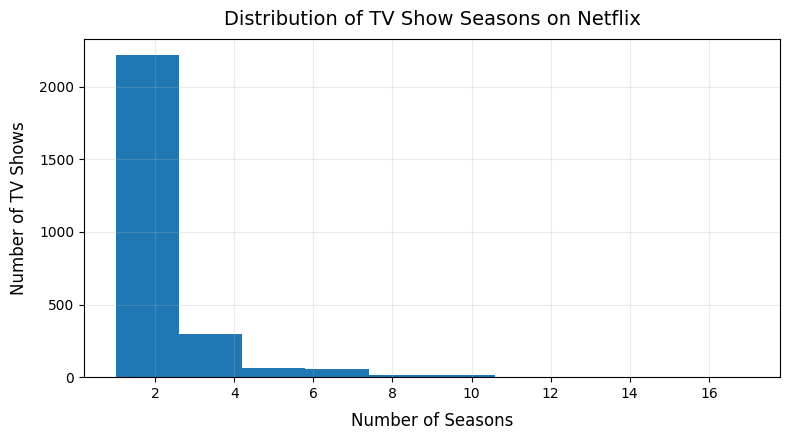

In [69]:
shows = df[df['type'] == 'TV Show']
shows['duration_num'].plot(kind='hist', bins=10)

plt.title('Distribution of TV Show Seasons on Netflix')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.show()


#### From the above chart, most Netflix TV shows have only 1 season, with a sharp drop in frequency for shows with more than 3 seasons, indicating a focus on shorter series.


### Number of Movies vs TV Shows

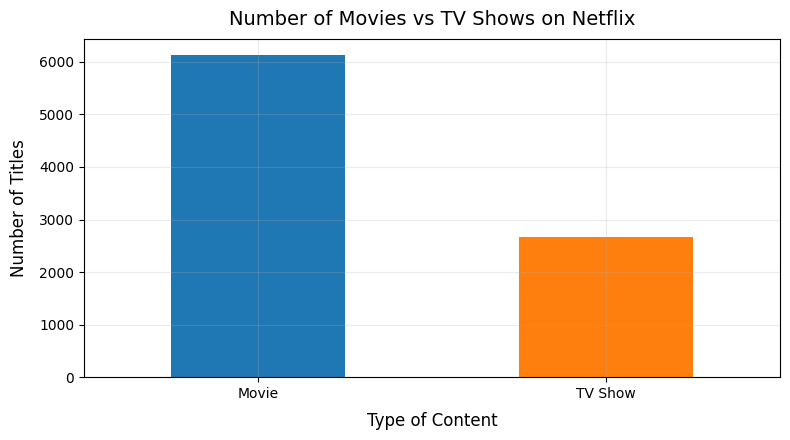

In [70]:
type_counts = df['type'].value_counts()

type_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])

plt.title('Number of Movies vs TV Shows on Netflix')
plt.xlabel('Type of Content')
plt.ylabel('Number of Titles')
plt.xticks(rotation=0)
plt.show()


#### From the above chart, we can see that Netflix has more Movies than TV Shows in its catalog.


### Number of Titles Added to Netflix by Year

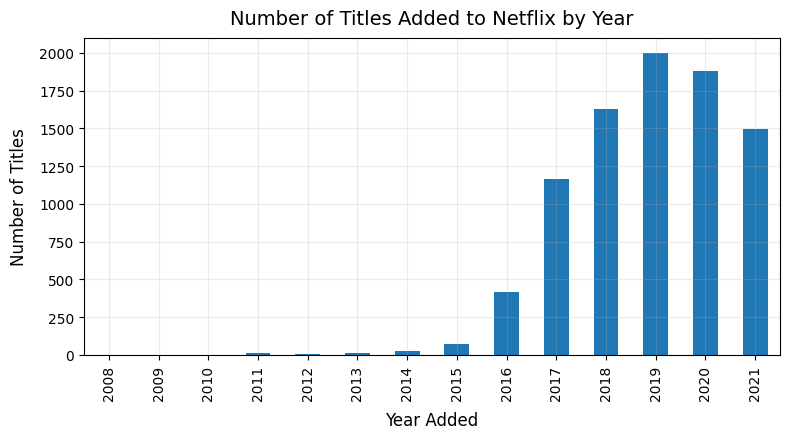

In [71]:
yearly_counts = (
    df.dropna(subset=['year_added'])
      .assign(year_added=lambda x: x['year_added'].astype(int))
      ['year_added']
      .value_counts()
      .sort_index()
)

yearly_counts.plot(kind='bar', color='#1f77b4')

plt.title('Number of Titles Added to Netflix by Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.show()


#### From the above chart, we can see a sharp increase in titles added to Netflix after 2015, peaking around 2019.


### Movies vs TV Shows Added to Netflix by Year

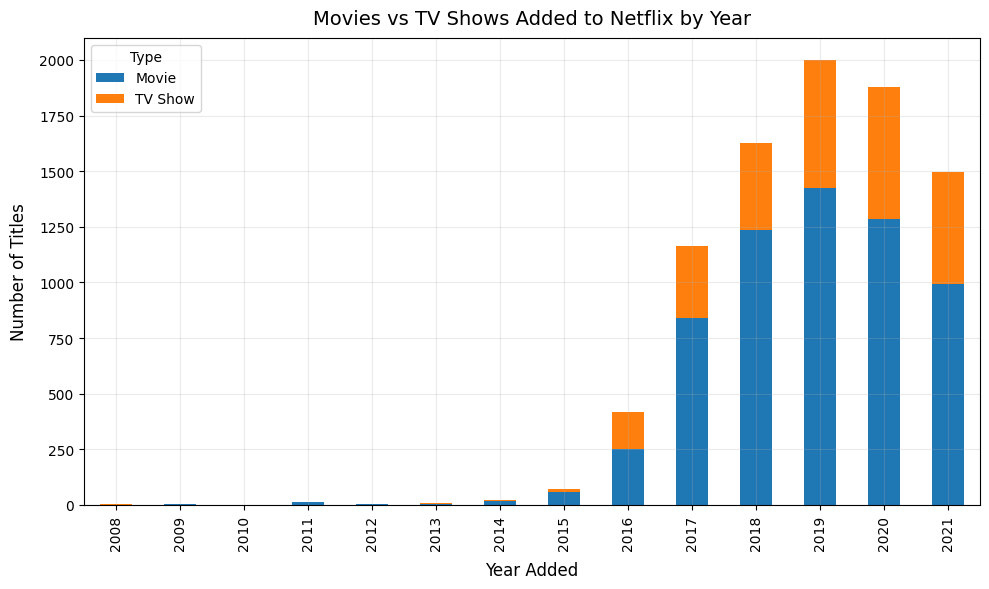

In [72]:
df_clean_years = df.dropna(subset=['year_added']).copy()
df_clean_years['year_added'] = df_clean_years['year_added'].astype(int)

type_per_year = df_clean_years.groupby(['year_added', 'type']).size().unstack(fill_value=0)

type_per_year.plot(kind='bar', stacked=True, figsize=(10,6))

plt.title('Movies vs TV Shows Added to Netflix by Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Type')
plt.show()


#### From the above chart, we can see that both Movies and TV Shows on Netflix increased significantly after 2015, with Movies consistently making up the larger share each year.


### Top 10 Countries Producing Netflix Content

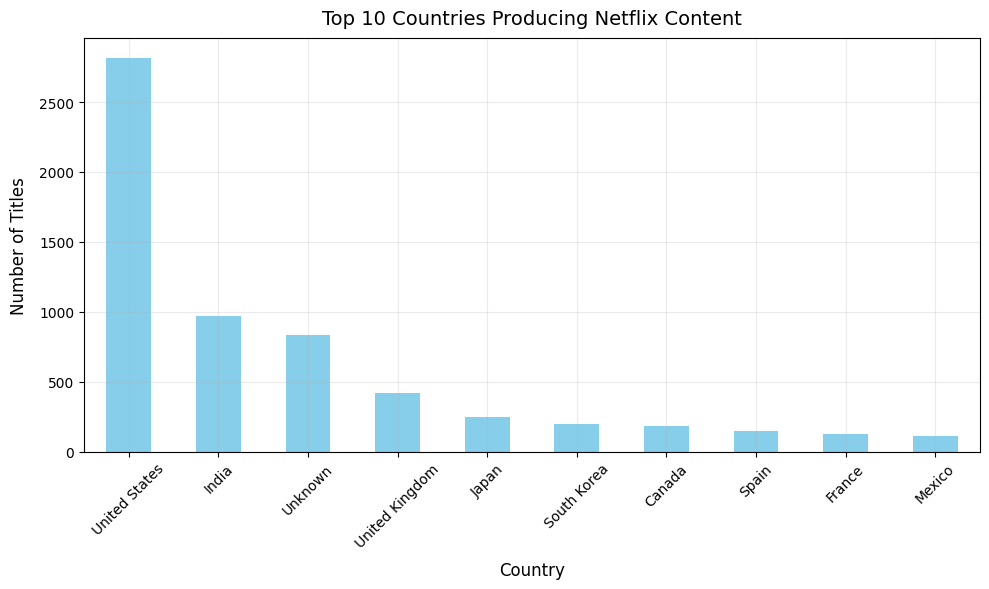

In [73]:
top_countries = (
    df['country_clean']
    .value_counts()
    .head(10)
)

plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


#### From the above chart, the United States is the leading producer of Netflix content, followed by India, while several other countries like the United Kingdom, Japan, and South Korea contribute smaller shares.


### Top 5 Countries Producing Movies vs TV Shows

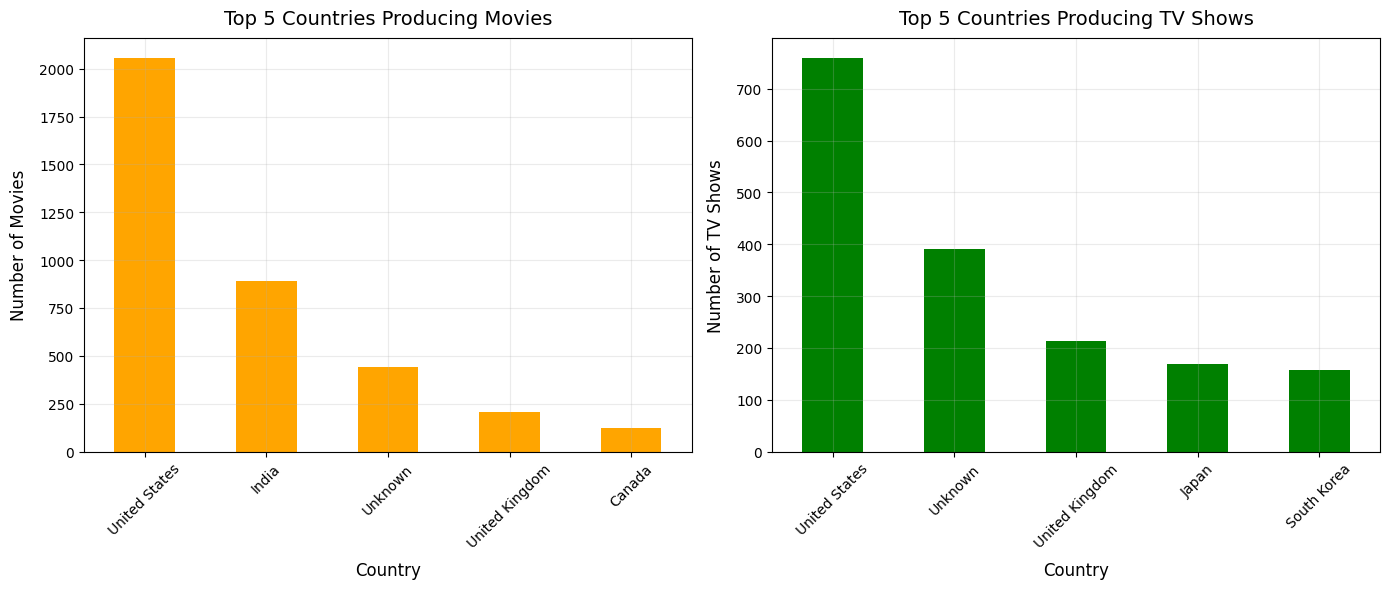

In [75]:
top_movies = (
    df[df['type'] == 'Movie']['country_clean']
    .value_counts()
    .head(5)
)

top_shows = (
    df[df['type'] == 'TV Show']['country_clean']
    .value_counts()
    .head(5)
)

fig, axes = plt.subplots(1, 2, figsize=(14,6))

top_movies.plot(kind='bar', ax=axes[0], color='orange')
axes[0].set_title('Top 5 Countries Producing Movies')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Number of Movies')
axes[0].tick_params(axis='x', rotation=45)

top_shows.plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Top 5 Countries Producing TV Shows')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Number of TV Shows')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


#### From the above charts, the United States dominates production for both movies and TV shows on Netflix, followed by India in movies, while TV shows have notable contributions from the UK, Japan, and South Korea.

### Top Genres

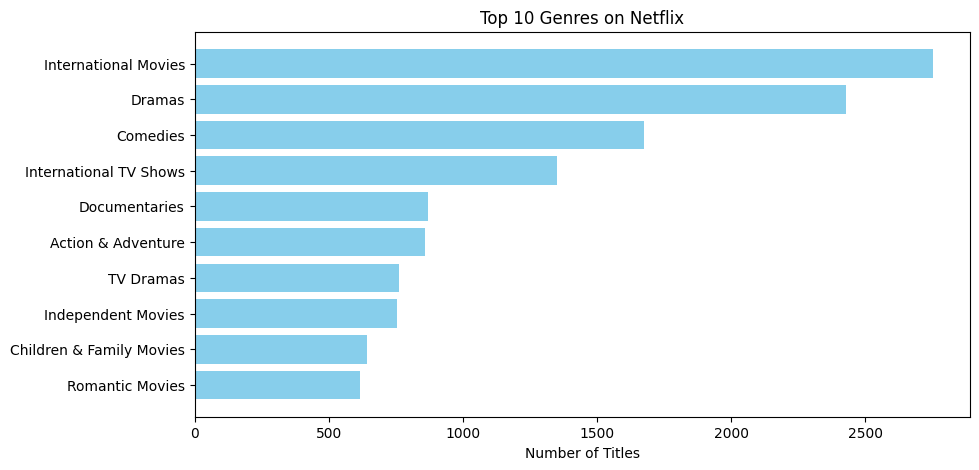

In [32]:
from collections import Counter

all_genres = df['listed_in'].dropna().str.split(',').sum()

all_genres = [genre.strip() for genre in all_genres]

genre_counts = Counter(all_genres)

genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])
genre_df = genre_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10,5))
plt.barh(genre_df['Genre'][:10][::-1], genre_df['Count'][:10][::-1], color='skyblue')
plt.xlabel('Number of Titles')
plt.title('Top 10 Genres on Netflix')
plt.show()


#### From the above chart, we can see that **International Movies**, **Dramas**, and **Comedies** are the most common genres on Netflix, indicating a strong focus on global content and narrative-driven storytelling.

### Ratings Analysis – Overall Distribution

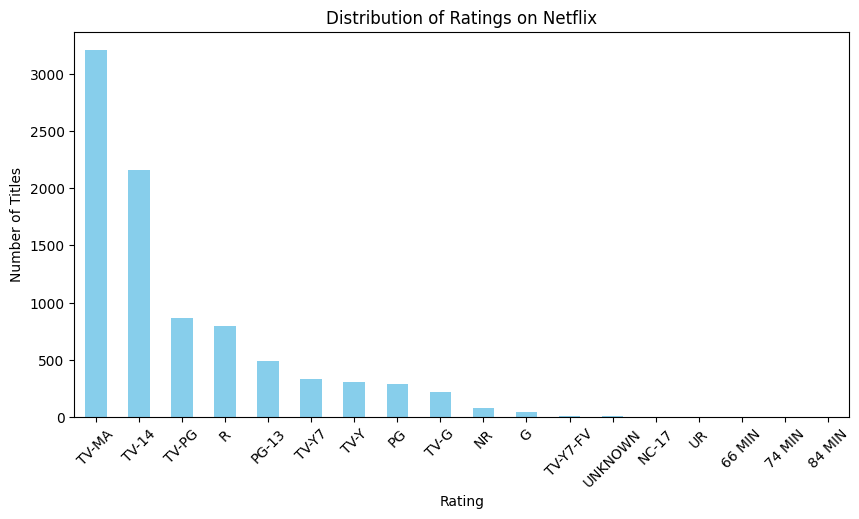

In [35]:
rating_counts = df['rating_clean'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,5))
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()



#### From the above chart, we can see that **TV-MA** is the most common rating on Netflix, followed by **TV-14**. This suggests that a large portion of Netflix content is intended for mature audiences.

### Ratings Analysis – Movies vs TV Shows

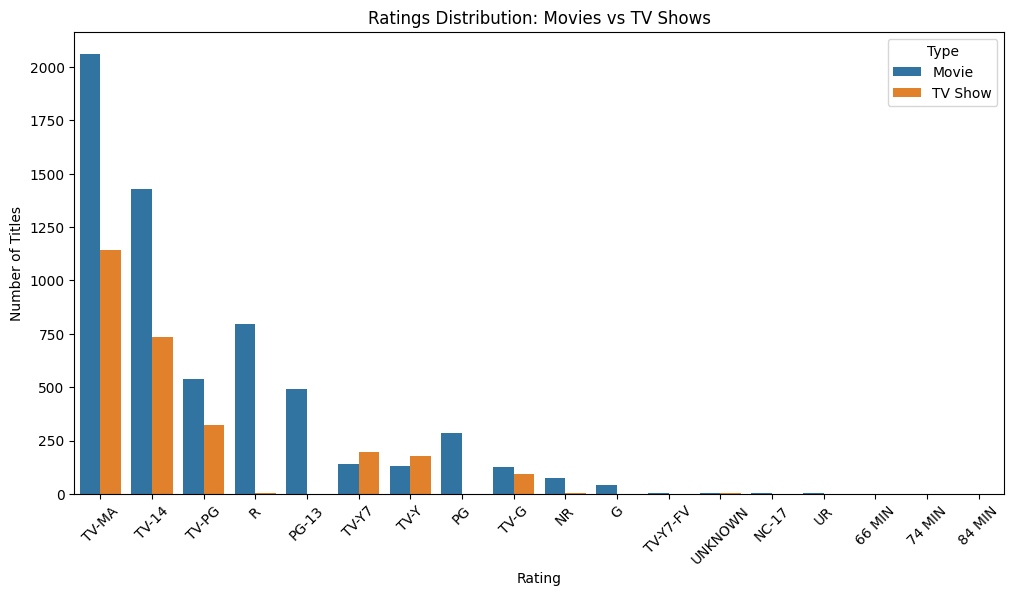

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='rating_clean', hue='type', order=rating_counts.index)
plt.title('Ratings Distribution: Movies vs TV Shows')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()


#### From the above chart, we can see that **TV-MA** and **TV-14** are the most common ratings for both movies and TV shows. However, movies have a higher proportion of **R**-rated content, while TV shows have slightly more titles in family-friendly categories like **TV-Y7** and **TV-Y**.

### Trend Insights – Peak Year and Growth Rates

In [37]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

yearly = (df.dropna(subset=['year_added'])
            .assign(year_added=lambda x: x['year_added'].astype(int))
            .groupby('year_added').size())

peak_year = int(yearly.idxmax())
peak_count = int(yearly.max())
pre_avg = yearly[yearly.index <= 2017].mean()
post_avg = yearly[yearly.index >= 2018].mean()

print(f"Peak year: {peak_year} with {peak_count} titles")
print(f"Avg per year (≤2017): {pre_avg:.1f}")
print(f"Avg per year (≥2018): {post_avg:.1f}")
print(f"Post vs Pre lift: {(post_avg/pre_avg - 1)*100:.1f}%")


Peak year: 2019 with 1999 titles
Avg per year (≤2017): 170.9
Avg per year (≥2018): 1750.0
Post vs Pre lift: 924.0%


#### From the above results, Netflix saw its highest content additions in 2019 with 1,999 titles.The average yearly additions jumped from about 171 titles before 2018 to 1,750 titles after 2018, marking a remarkable 924% increase in content production.


### Trend Insights – Pre vs Post-2018 Comparison

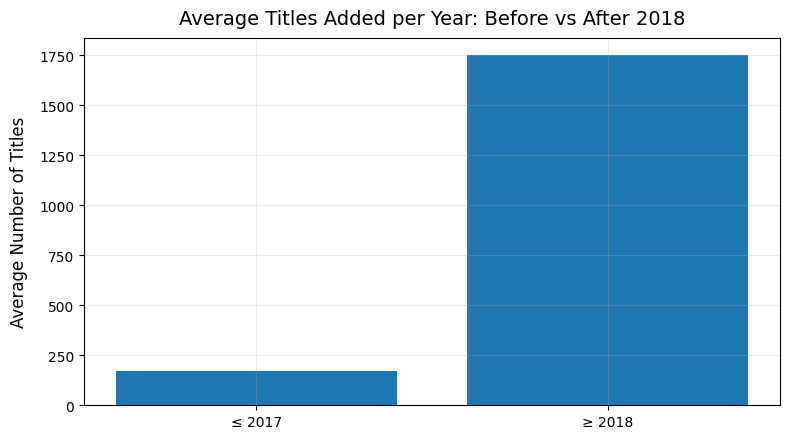

In [77]:
pre_avg = yearly[yearly.index <= 2017].mean()
post_avg = yearly[yearly.index >= 2018].mean()

plt.bar(['≤ 2017', '≥ 2018'], [pre_avg, post_avg])
plt.title('Average Titles Added per Year: Before vs After 2018')
plt.ylabel('Average Number of Titles')
plt.show()


#### From the above chart, the average yearly additions on Netflix increased drastically after 2018, rising from around 171 titles before 2018 to about 1,750 titles, highlighting a massive content expansion.


### Trend Insights – Movies vs TV Shows Growth Over Time

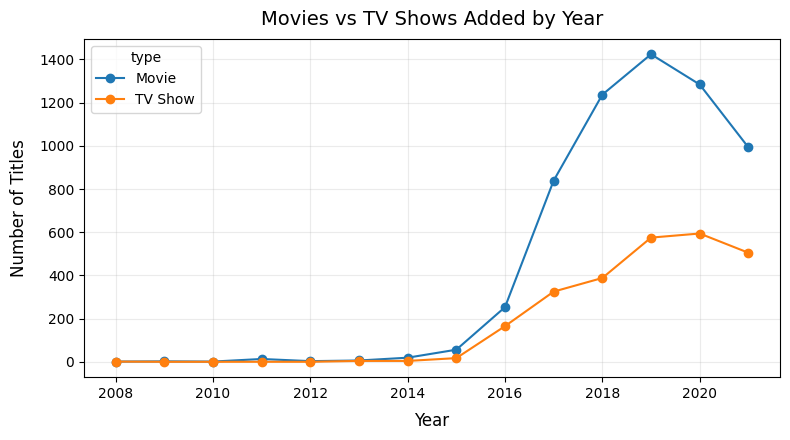

In [78]:
by_year_type = (df.dropna(subset=['year_added'])
                  .assign(year_added=lambda x: x['year_added'].astype(int))
                  .groupby(['year_added','type']).size()
                  .unstack(fill_value=0))

ax = by_year_type.plot(marker='o')
ax.set_title('Movies vs TV Shows Added by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Titles')
plt.show()


#### From the above chart, both movies and TV shows saw rapid growth in releases after 2015, with movies peaking in 2019 and TV shows peaking in 2020, indicating a strong expansion in both categories.


### Trend Insights
From the above charts, we can see that Netflix's content growth accelerated sharply after 2016, with a significant surge post-2018. Before 2018, Netflix added an average of ~171 titles per year, compared to ~1,750 titles per year after 2018 — an increase of over 900%. The peak year was 2019, with 1,999 titles added, likely driven by Netflix’s global expansion, increased original productions, and aggressive content acquisition to compete with emerging streaming platforms.

## Conclusions
- Netflix’s catalog is dominated by Movies, though TV Shows have grown steadily.
- Content additions surged after 2016 and peaked in 2019.
- TV‑MA and TV‑14 are the most common ratings (mature/teen audiences).
- International Movies, Dramas, and Comedies are the most frequent genres.
- The United States and India contribute the largest number of titles.

## Limitations & Notes
- Some fields (director, cast, country) were missing and labeled as "Unknown".
- `date_added` is not available for all titles; missing rows were excluded from time‑series plots.
- Multi‑genre labels can inflate counts (one title appears in multiple genres).
- The dataset doesn’t reliably mark “Netflix Originals”.
